In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv(r"C:\Users\bajpa\Downloads\PAN+Card+Validation+in+PYTHON+-+Scripts\Health_Sleep_Statistics.csv")
df.head()

,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,1,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,2,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,3,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
3,4,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
4,5,22,f,8,23:30,07:00,10000,2800,high,medium,no,no


In [4]:
df.shape

(100, 12)

In [5]:
df.columns

Index(['User ID', 'Age', 'Gender', 'Sleep Quality', 'Bedtime', 'Wake-up Time',
       'Daily Steps', 'Calories Burned', 'Physical Activity Level',
       'Dietary Habits', 'Sleep Disorders', 'Medication Usage'],
      dtype='object')

In [6]:
df.size

1200

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   User ID                  100 non-null    int64 
 1   Age                      100 non-null    int64 
 2   Gender                   100 non-null    object
 3   Sleep Quality            100 non-null    int64 
 4   Bedtime                  100 non-null    object
 5   Wake-up Time             100 non-null    object
 6   Daily Steps              100 non-null    int64 
 7   Calories Burned          100 non-null    int64 
 8   Physical Activity Level  100 non-null    object
 9   Dietary Habits           100 non-null    object
 10  Sleep Disorders          100 non-null    object
 11  Medication Usage         100 non-null    object
dtypes: int64(5), object(7)
memory usage: 9.5+ KB


In [8]:
df.describe()

,User ID,Age,Sleep Quality,Daily Steps,Calories Burned
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,50.500000,36.010000,7.000000,6830.000000,2421.00000
std,29.011492,8.454865,1.734964,2498.706736,281.06759
min,1.000000,22.000000,4.000000,3000.000000,2000.00000
25%,25.750000,28.750000,5.750000,4750.000000,2175.00000
50%,50.500000,35.000000,7.500000,6750.000000,2400.00000
75%,75.250000,44.000000,8.250000,9000.000000,2700.00000
max,100.000000,50.000000,9.000000,11000.000000,2900.00000


In [9]:
df.isnull().sum()

User ID                    0
Age                        0
Gender                     0
Sleep Quality              0
Bedtime                    0
Wake-up Time               0
Daily Steps                0
Calories Burned            0
Physical Activity Level    0
Dietary Habits             0
Sleep Disorders            0
Medication Usage           0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.drop(['User ID'],axis = 1, inplace=True)

In [12]:
df.head()

,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
3,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
4,22,f,8,23:30,07:00,10000,2800,high,medium,no,no


In [13]:
#Age Vs Sleep Quality Analysis

age_sleep_quality_corr = df[['Age','Sleep Quality']].corr()

In [14]:
age_sleep_quality_corr

,Age,Sleep Quality
Age,1.000000,-0.848356
Sleep Quality,-0.848356,1.000000


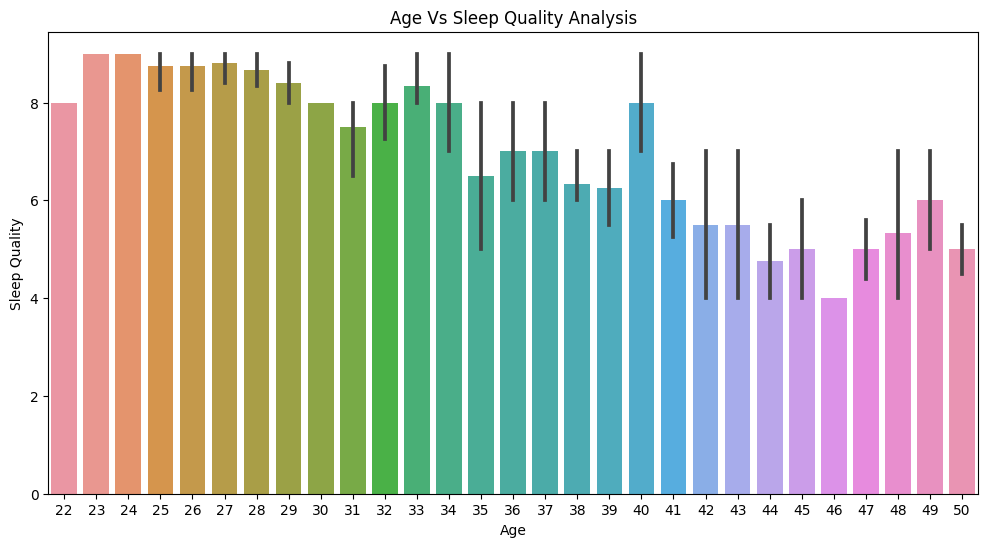

In [15]:
plt.figure(figsize=(12,6))

sns.barplot(x='Age',y='Sleep Quality',data = df)
plt.title("Age Vs Sleep Quality Analysis")
plt.xlabel("Age")
plt.ylabel("Sleep Quality")
plt.show()

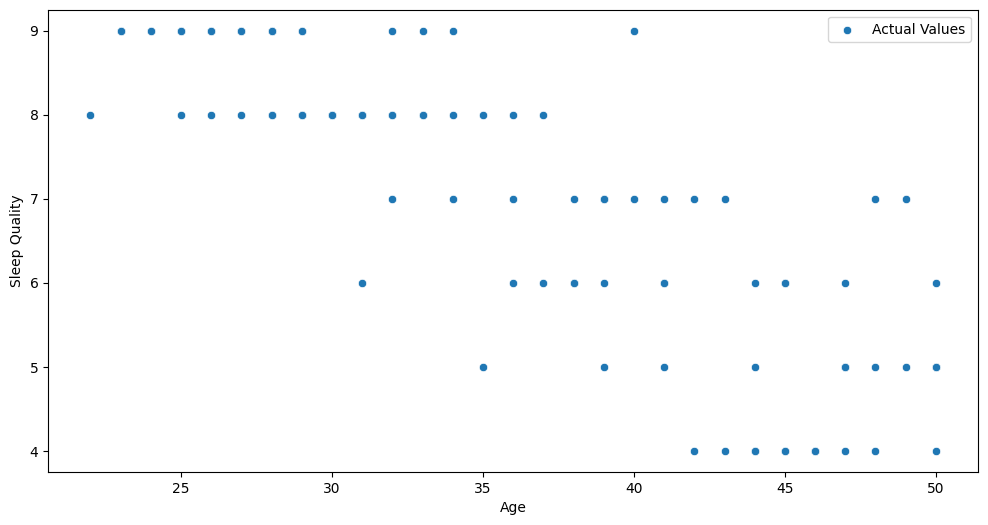

In [16]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Age',y='Sleep Quality',data = df, label = 'Actual Values')
plt.show()

In [17]:
df['Physical Activity Level'].head()

0    medium
1       low
2      high
3       low
4      high
Name: Physical Activity Level, dtype: object

In [18]:
df['Sleep Quality'].head()

0    8
1    7
2    9
3    5
4    8
Name: Sleep Quality, dtype: int64

In [19]:
df['Gender'].head()

0    f
1    m
2    f
3    m
4    f
Name: Gender, dtype: object

<Axes: xlabel='Gender', ylabel='Sleep Quality'>

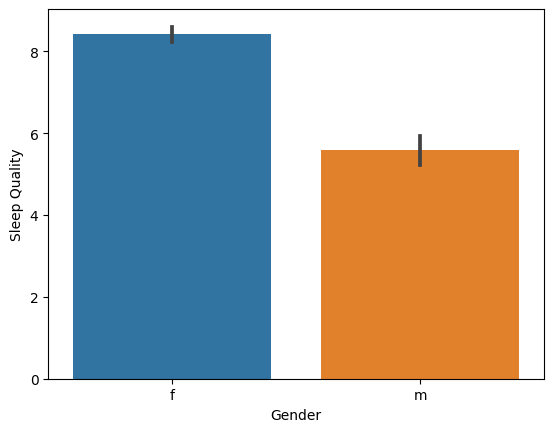

In [21]:
sns.barplot(x="Gender",y="Sleep Quality",data=df)

<Axes: xlabel='Physical Activity Level', ylabel='Sleep Quality'>

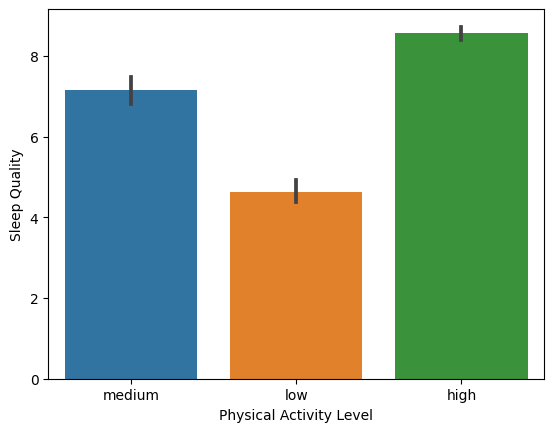

In [23]:
sns.barplot(x="Physical Activity Level",y="Sleep Quality",data=df)

In [24]:
custom_codes= {'low':1, 'medium':2,'high':3}
df['Physical Activity Level'] =df['Physical Activity Level'].map(custom_codes)
df['Physical Activity Level'].head()

0    2
1    1
2    3
3    1
4    3
Name: Physical Activity Level, dtype: int64

<Axes: xlabel='Gender', ylabel='Physical Activity Level'>

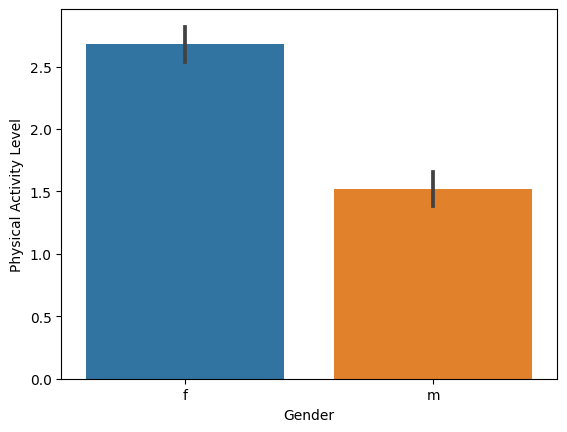

In [25]:
sns.barplot(x="Gender",y="Physical Activity Level",data=df)

In [26]:
df['Bedtime'].head()

0    23:00
1    00:30
2    22:45
3    01:00
4    23:30
Name: Bedtime, dtype: object

In [27]:
df['Wake-up Time'].head()

0    06:30
1    07:00
2    06:45
3    06:30
4    07:00
Name: Wake-up Time, dtype: object

In [29]:
def sleep_time_helper_function(str_time):
    h = str_time.split(":")[0]
    m=str_time.split(":")[1]
    
    return int(h) + int(m)/60

df['Bedtime'] = df['Bedtime'].apply(sleep_time_helper_function)
df['Wake-up Time'] =df['Wake-up Time'].apply(sleep_time_helper_function)

In [30]:
df['Bedtime'].head()

0    23.00
1     0.50
2    22.75
3     1.00
4    23.50
Name: Bedtime, dtype: float64

In [31]:
df['Sleep Duration Hours'] = (df['Wake-up Time'] - df['Bedtime']) % 24
df['Sleep Duration Hours'].head()

0    7.5
1    6.5
2    8.0
3    5.5
4    7.5
Name: Sleep Duration Hours, dtype: float64

In [32]:
df.head()

,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage,Sleep Duration Hours
0,25,f,8,23.00,6.50,8000,2500,2,healthy,no,no,7.5
1,34,m,7,0.50,7.00,5000,2200,1,unhealthy,yes,yes,6.5
2,29,f,9,22.75,6.75,9000,2700,3,healthy,no,no,8.0
3,41,m,5,1.00,6.50,4000,2100,1,unhealthy,yes,no,5.5
4,22,f,8,23.50,7.00,10000,2800,3,medium,no,no,7.5


<Axes: xlabel='Bedtime', ylabel='Sleep Quality'>

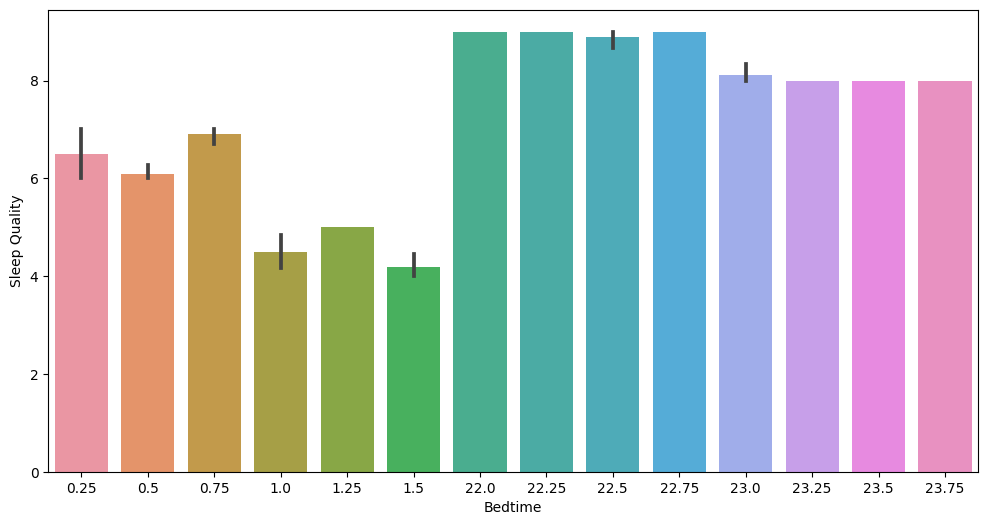

In [34]:
plt.figure(figsize=(12,6))
sns.barplot(x = 'Bedtime',y='Sleep Quality',data=df)

<Axes: xlabel='Wake-up Time', ylabel='Sleep Quality'>

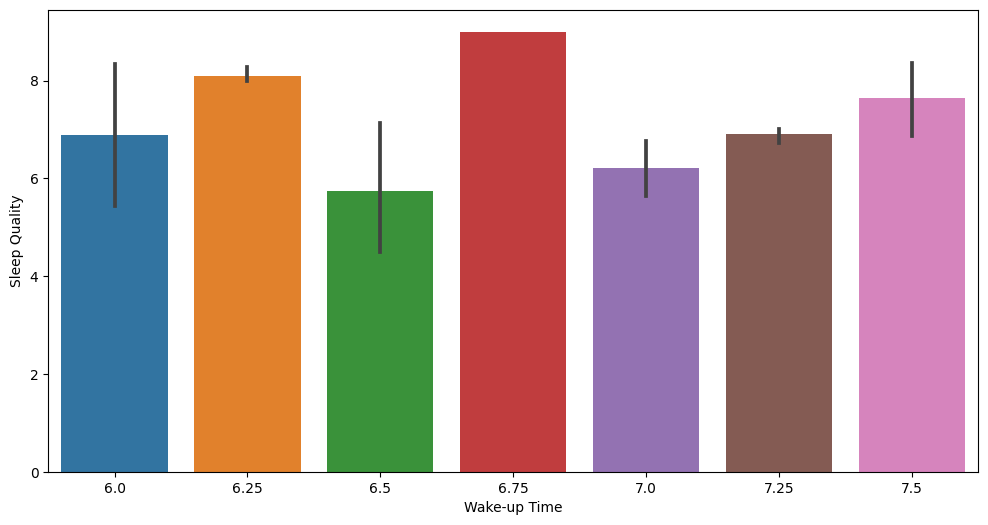

In [35]:
plt.figure(figsize=(12,6))
sns.barplot(x = 'Wake-up Time',y='Sleep Quality',data=df)

<Axes: xlabel='Sleep Duration Hours', ylabel='Sleep Quality'>

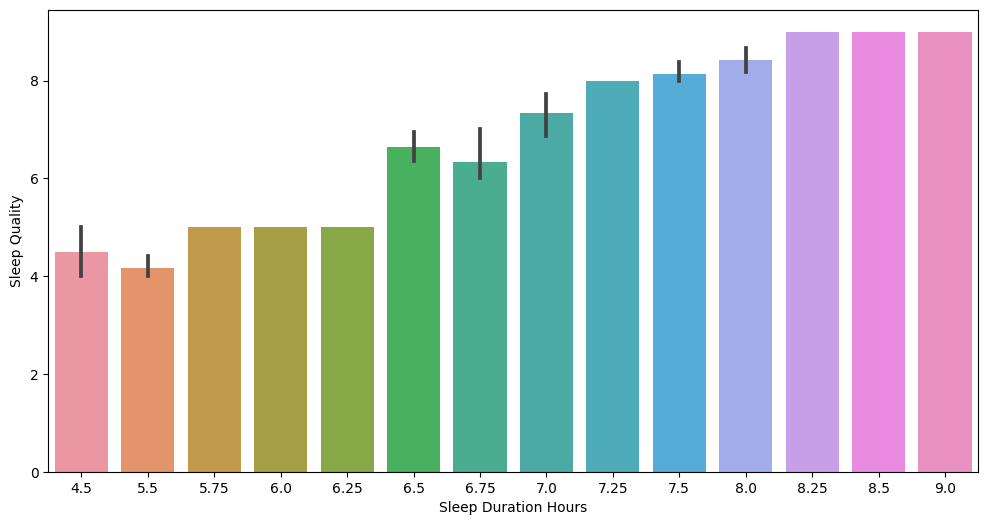

In [36]:
plt.figure(figsize=(12,6))
sns.barplot(x = 'Sleep Duration Hours',y='Sleep Quality',data=df)

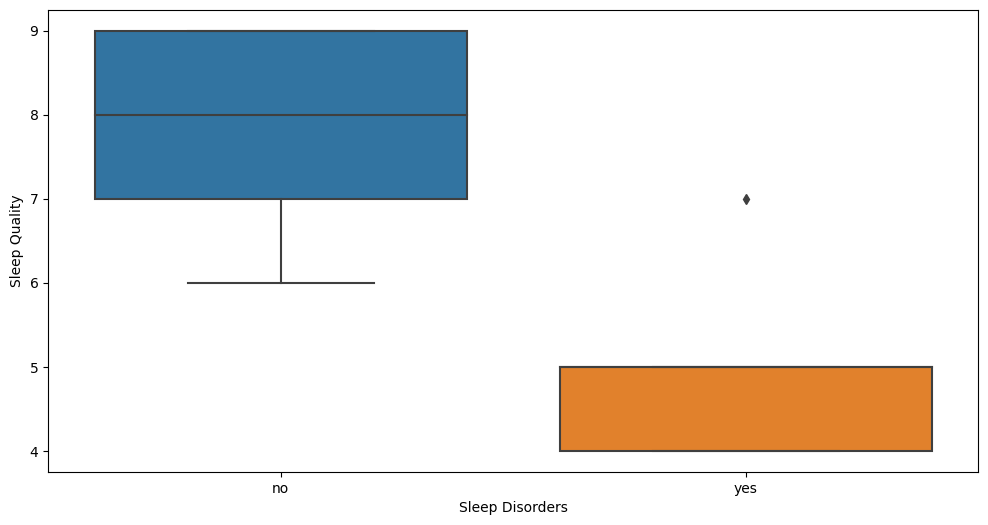

In [37]:
plt.figure(figsize=(12,6))
sns.boxplot(x = 'Sleep Disorders',y='Sleep Quality',data=df)
plt.show()

<Axes: >

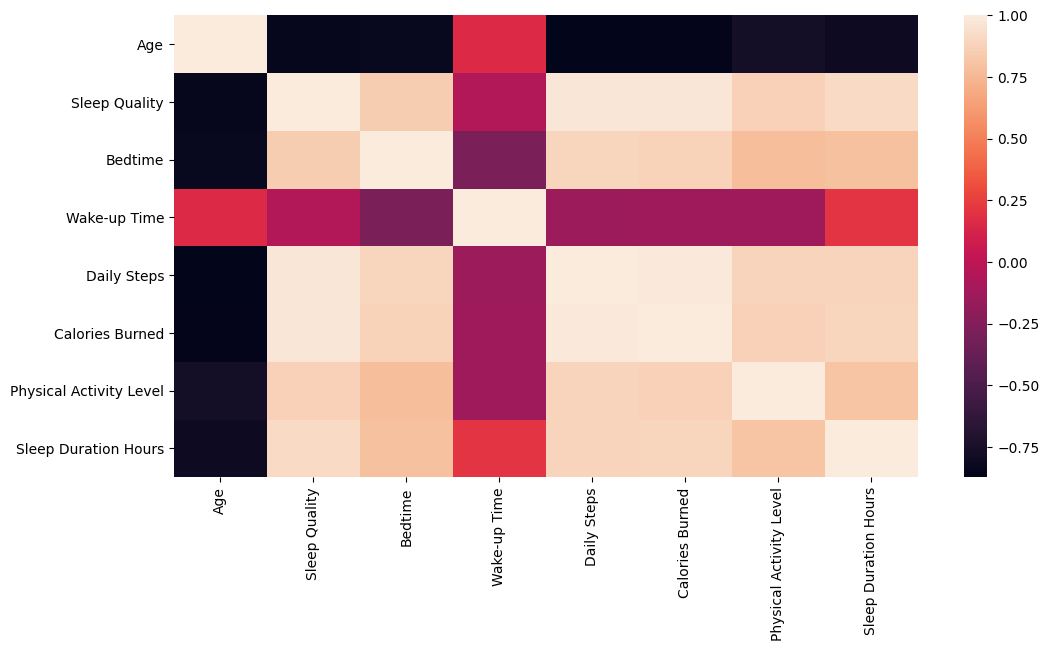

In [39]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(numeric_only=True))

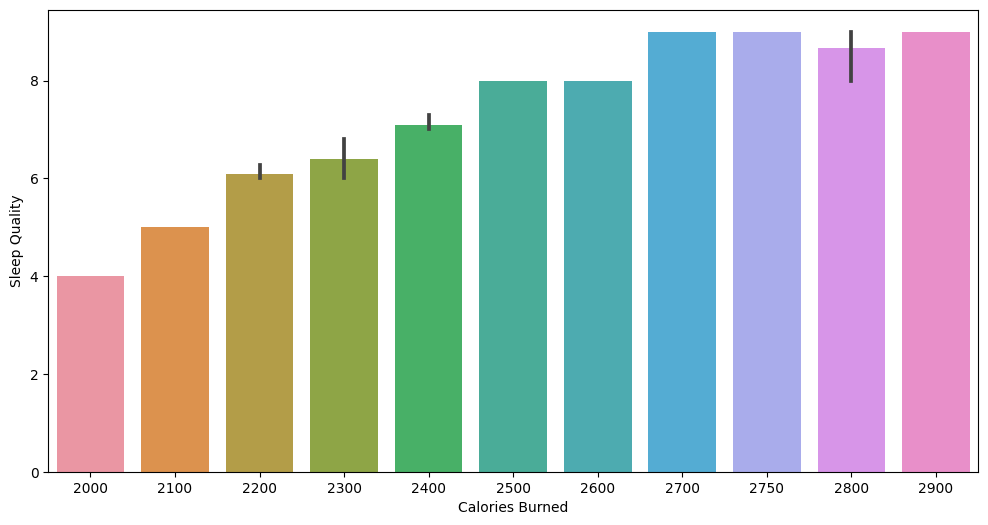

In [40]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Calories Burned', y = 'Sleep Quality', data = df)
plt.show()

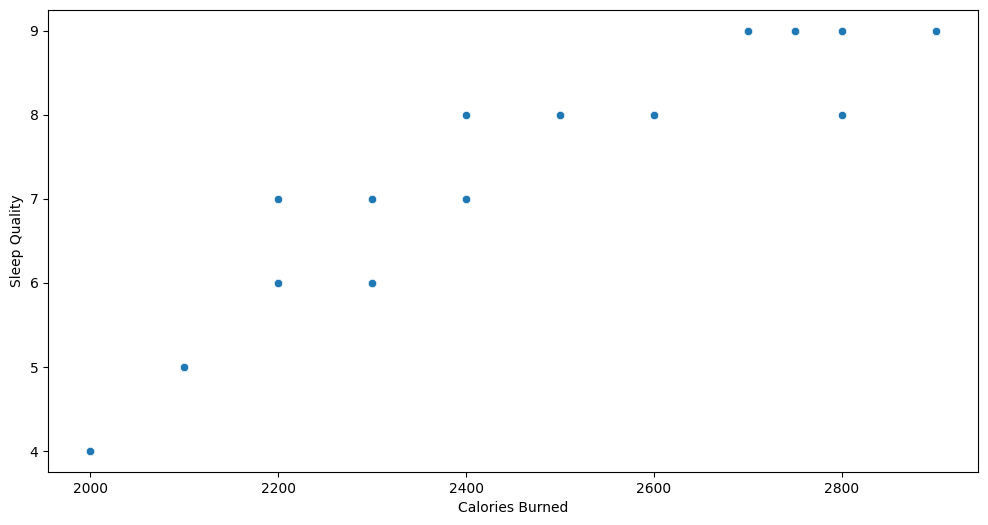

In [41]:
plt.figure(figsize = (12,6))
sns.scatterplot(x = 'Calories Burned', y = 'Sleep Quality', data = df)
plt.show()

In [42]:
df['Dietary Habits'].value_counts()

Dietary Habits
unhealthy    41
medium       30
healthy      29
Name: count, dtype: int64

In [43]:
# Define your custom codes
custom_codes = {'unhealthy': 1, 'medium': 2, 'healthy': 3}

# Apply the custom codes using map()
df['Dietary Habits'] = df['Dietary Habits'].map(custom_codes)
df.head()

,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage,Sleep Duration Hours
0,25,f,8,23.00,6.50,8000,2500,2,3,no,no,7.5
1,34,m,7,0.50,7.00,5000,2200,1,1,yes,yes,6.5
2,29,f,9,22.75,6.75,9000,2700,3,3,no,no,8.0
3,41,m,5,1.00,6.50,4000,2100,1,1,yes,no,5.5
4,22,f,8,23.50,7.00,10000,2800,3,2,no,no,7.5


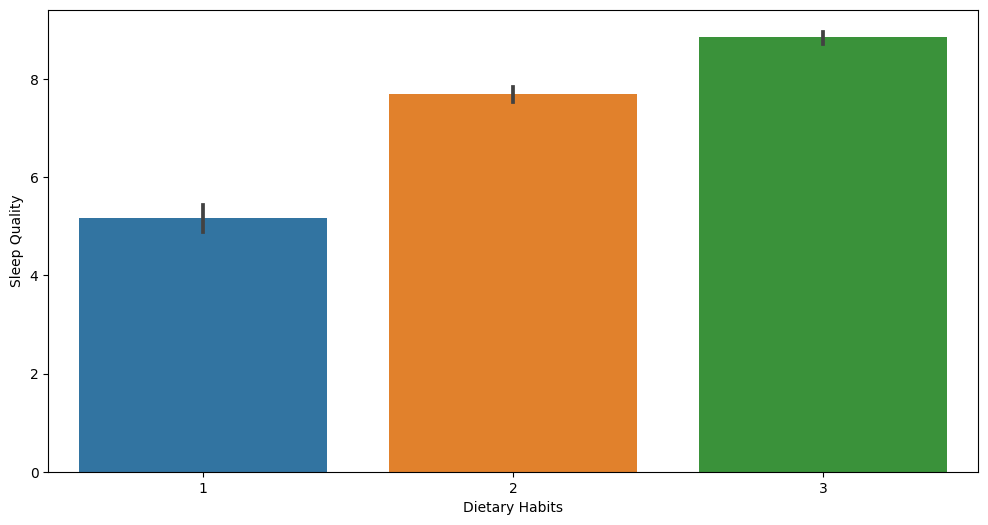

In [44]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Dietary Habits', y = 'Sleep Quality', data = df)
plt.show()

In [45]:
df['Sleep Disorders'].head()

0     no
1    yes
2     no
3    yes
4     no
Name: Sleep Disorders, dtype: object

In [46]:
sleep_disorder_sleep_quality_summary = df.groupby('Sleep Disorders').agg({
    'Sleep Quality': ['mean', 'std'],
    'Physical Activity Level': lambda x: x.value_counts().to_dict()
})
print(sleep_disorder_sleep_quality_summary)

                Sleep Quality           Physical Activity Level
                         mean       std                <lambda>
Sleep Disorders                                                
no                   7.837838  1.085736          {2: 38, 3: 36}
yes                  4.615385  0.697247                 {1: 26}


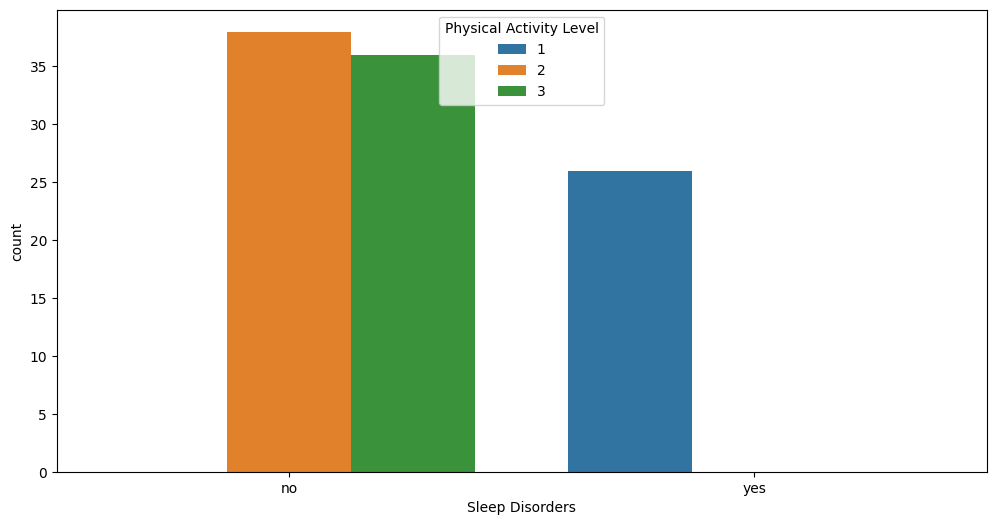

In [47]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'Sleep Disorders', hue = 'Physical Activity Level', data = df)
plt.show()

Text(0, 0.5, 'Sleep Quality')

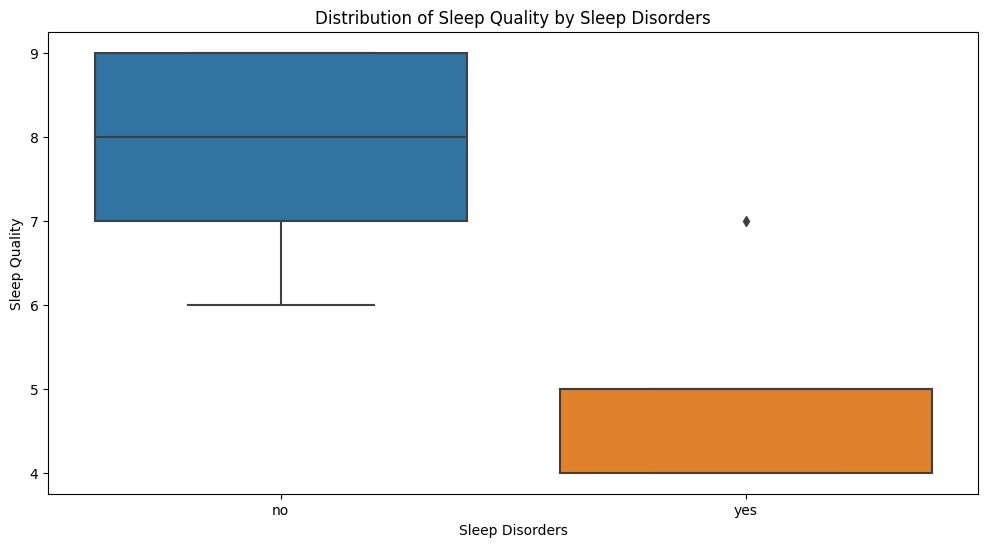

In [48]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sleep Disorders', y='Sleep Quality', data=df)
plt.title('Distribution of Sleep Quality by Sleep Disorders')
plt.xlabel('Sleep Disorders')
plt.ylabel('Sleep Quality')

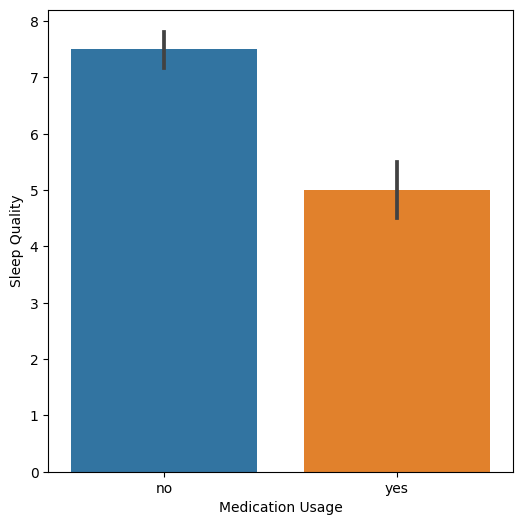

In [49]:
plt.figure(figsize = (6, 6))
sns.barplot(x = 'Medication Usage', y = 'Sleep Quality', data = df)
plt.show()

In [50]:
df_numerics = df.select_dtypes(include = ['number'])
corr = df_numerics.corr()

print(corr['Sleep Quality'].sort_values(ascending=False))

Sleep Quality              1.000000
Daily Steps                0.976277
Calories Burned            0.973557
Sleep Duration Hours       0.918909
Dietary Habits             0.902498
Physical Activity Level    0.875203
Bedtime                    0.853312
Wake-up Time              -0.048526
Age                       -0.848356
Name: Sleep Quality, dtype: float64


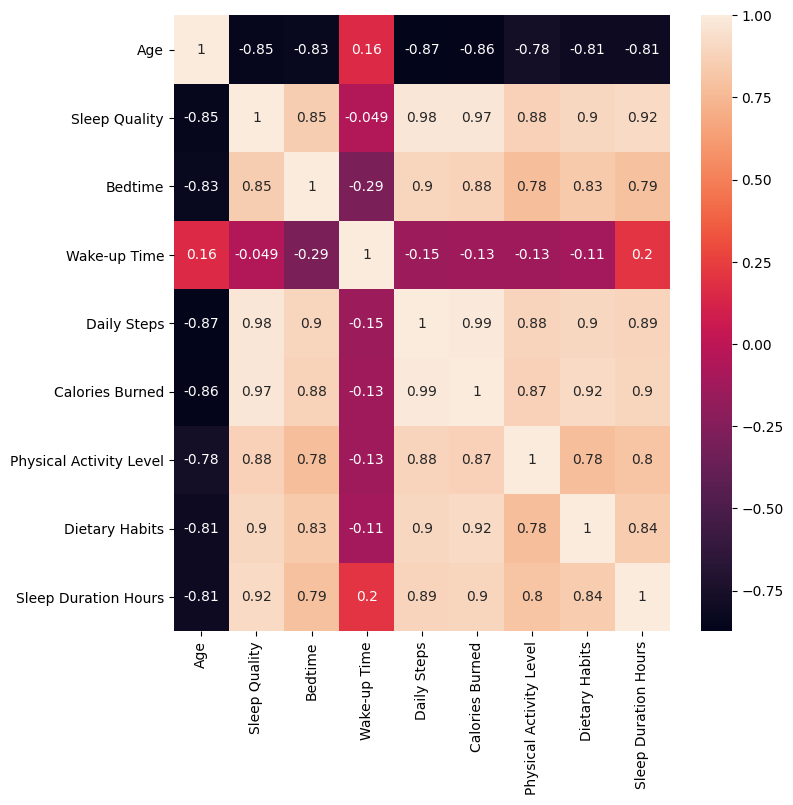

In [51]:
plt.figure(figsize = (8,8))
sns.heatmap(corr, annot = True)
plt.show()